In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime

In [62]:
data = pd.read_csv("./new_york_city.csv")

#data preparation
data.columns = data.columns.str.replace(" ", "_")
data.columns = map(str.lower, data.columns)

#convert string of date to object
startdatelist = list(data.start_time)
startdates = [datetime.datetime.strptime(date.split()[0], "%Y-%m-%d") for date in startdatelist]
data['start_time'] = np.array(startdates)

#convert string of date to object
enddatelist = list(data.end_time)
enddates = [datetime.datetime.strptime(date.split()[0], "%Y-%m-%d") for date in enddatelist]
data['end_time'] = np.array(enddates)


In [63]:
#create month based on the start of trip
startdatelist = list(data.start_time)
startmonthdates = [date.month for date in startdatelist]
data['monthstart'] = np.array(startmonthdates)

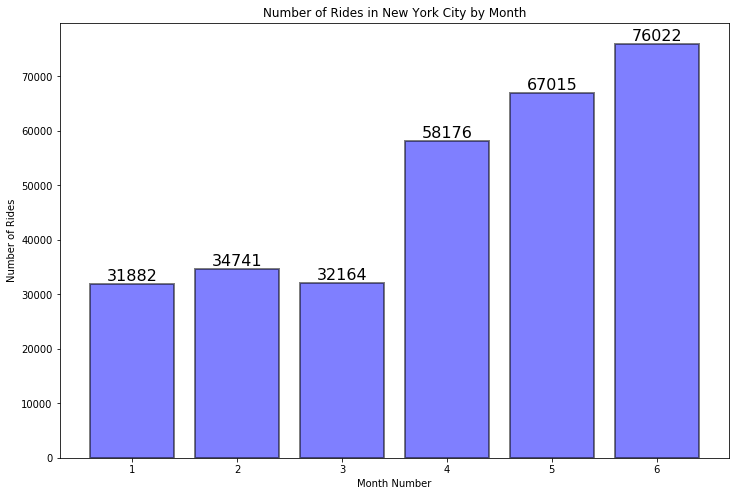

In [5]:
#number of rides for each month
plt.figure(figsize=(12, 8))
arr = plt.hist(data['monthstart'], bins = range(1,8), facecolor='blue', alpha=0.5, rwidth = 0.8, edgecolor='black', align="left", linewidth=2.0)
plt.xlabel('Month Number')
plt.ylabel('Number of Rides')
plt.title('Number of Rides in New York City by Month')
for i in range(6):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i].astype(int)),horizontalalignment='center', verticalalignment='bottom', fontsize = 16)
    
    

Female Rides Total Count: 66783
Male Rides Total Count: 204008


Text(0,0.5,'Number of Rides')

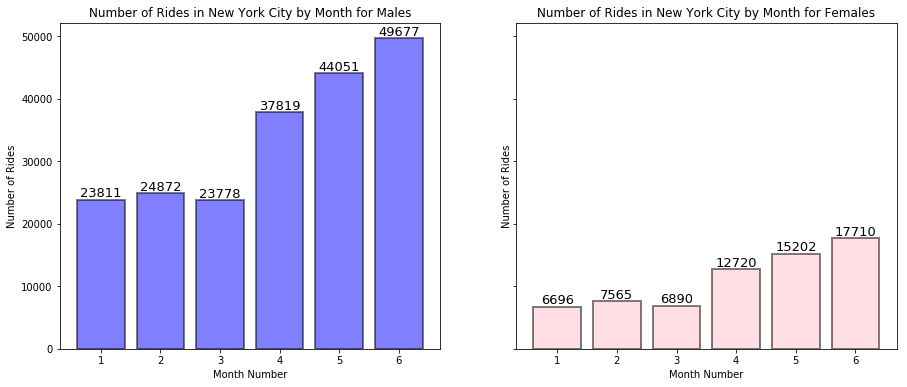

In [6]:
females = data[data.gender == 'Female']
males = data[data.gender == 'Male']
# a lot less females than males use bike sharing. Females: 
print("Female Rides Total Count: " + str(len(females)))
print("Male Rides Total Count: " + str(len(males)))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))

#histogram for male rides
arr1 = ax1.hist(males['monthstart'], bins = range(1,8), facecolor='blue', alpha=0.5, rwidth = 0.8, edgecolor='black', align="left", linewidth=2.0)
for i in range(6):
    ax1.text(arr1[1][i],arr1[0][i],str(arr1[0][i].astype(int)),horizontalalignment='center', verticalalignment='bottom', fontsize = 13)
ax1.set_title('Number of Rides in New York City by Month for Males')
ax1.set_xlabel('Month Number')
ax1.set_ylabel('Number of Rides')

# histogram for female rides
arr2 = ax2.hist(females['monthstart'], bins = range(1,8), facecolor='pink', alpha=0.5, rwidth = 0.8, edgecolor='black', align="left", linewidth=2.0)
for i in range(6):
    ax2.text(arr2[1][i],arr2[0][i],str(arr2[0][i].astype(int)),horizontalalignment='center', verticalalignment='bottom', fontsize = 13)
ax2.set_title('Number of Rides in New York City by Month for Females')
ax2.set_xlabel('Month Number')
ax2.set_ylabel('Number of Rides')

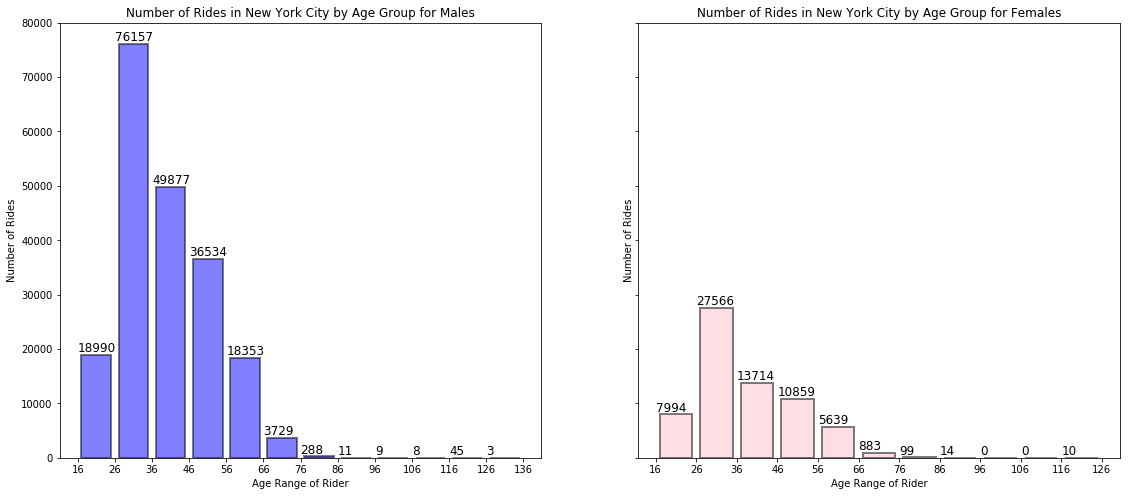

In [7]:
#calculate age, removing NA 
birth = data.dropna(subset=['birth_year'], axis = 0)
births = birth.copy()
birthlist = list(births.birth_year)
birthlistage = [2017.0 - year for year in birthlist]
births['age'] = np.array(birthlistage)
femaleages = births[births.gender == 'Female']
maleages = births[births.gender == 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(19,8))
#histogram for males
arr1 = ax1.hist(maleages['age'], bins= np.arange(min(maleages['age']), max(maleages['age']) + 10, 10),
                facecolor='blue', alpha=0.5, rwidth = 0.8, edgecolor='black', linewidth=2.0)
for i in range(12):
    ax1.text(arr1[1][i],arr1[0][i],str(arr1[0][i].astype(int)), verticalalignment='bottom', fontsize = 12)
ax1.set_title('Number of Rides in New York City by Age Group for Males')
ax1.set_xlabel('Age Range of Rider')
ax1.set_ylabel('Number of Rides')
ax1.xaxis.set_ticks(np.arange(min(maleages['age']), max(maleages['age']) + 10, 10))

# histogram for females
arr2 = ax2.hist(femaleages['age'], bins = np.arange(min(femaleages['age']), max(femaleages['age']) + 10, 10),
                facecolor='pink', alpha=0.5, rwidth = 0.8, edgecolor='black', linewidth=2.0)
for i in range(11):
    ax2.text(arr2[1][i],arr2[0][i],str(arr2[0][i].astype(int)), verticalalignment='bottom', fontsize = 12)
ax2.set_title('Number of Rides in New York City by Age Group for Females')
ax2.set_xlabel('Age Range of Rider')
ax2.set_ylabel('Number of Rides')
ax2.xaxis.set_ticks(np.arange(min(femaleages['age']), max(femaleages['age']) + 10, 10))



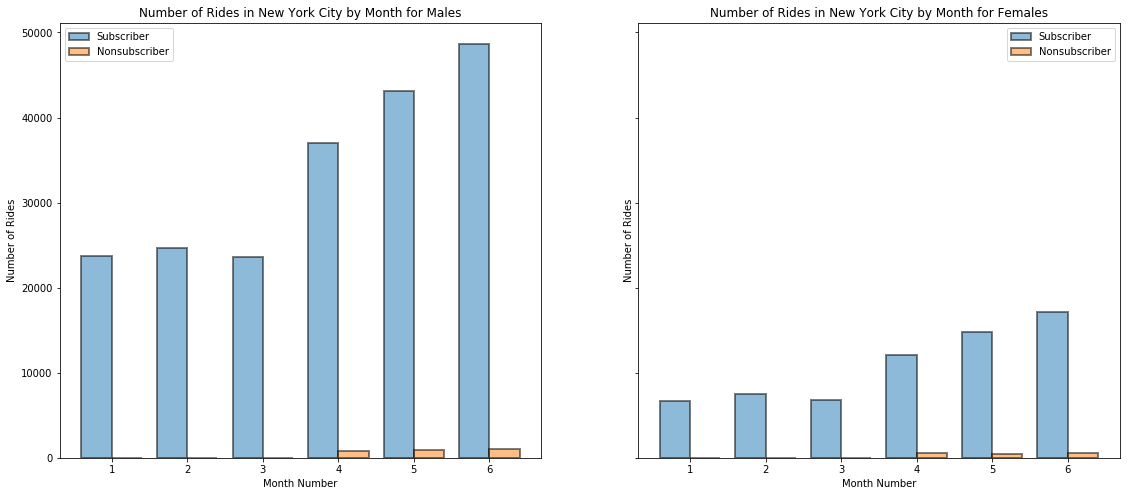

In [8]:
maleages = births[births.gender == 'Male']
malesubs = births[(births.gender == 'Male') & (births.user_type == 'Subscriber')] 
malenonsubs = births[(births.gender == 'Male') & (births.user_type == 'Customer')] 
femalesubs = births[(births.gender == 'Female') & (births.user_type == 'Subscriber')] 
femalenonsubs = births[(births.gender == 'Female') & (births.user_type == 'Customer')] 

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(19,8))
arr1 = ax1.hist((malesubs['monthstart'], malenonsubs['monthstart']), label = ("Subscriber", "Nonsubscriber"), bins = range(1,8), 
        alpha=0.5, rwidth = 0.8, edgecolor='black', align="left", linewidth=2.0)
#for i in range(7):
#    ax1.text(arr1[1][i],arr1[0][i],str(arr1[0][i].astype(int)),horizontalalignment='center', verticalalignment='bottom', fontsize = 13)
ax1.set_title('Number of Rides in New York City by Month for Males')
ax1.set_xlabel('Month Number')
ax1.set_ylabel('Number of Rides')
ax1.legend()

arr2 = ax2.hist((femalesubs['monthstart'], femalenonsubs['monthstart']), label = ("Subscriber", "Nonsubscriber"), bins = range(1,8), alpha=0.5, rwidth = 0.8, edgecolor='black', align="left", linewidth=2.0)
#for i in range(6):
#    ax2.text(arr2[1][i],arr2[0][i],str(arr2[0][i].astype(int)),horizontalalignment='center', verticalalignment='bottom', fontsize = 13)
ax2.set_title('Number of Rides in New York City by Month for Females')
ax2.set_xlabel('Month Number')
ax2.set_ylabel('Number of Rides')
ax2.legend()


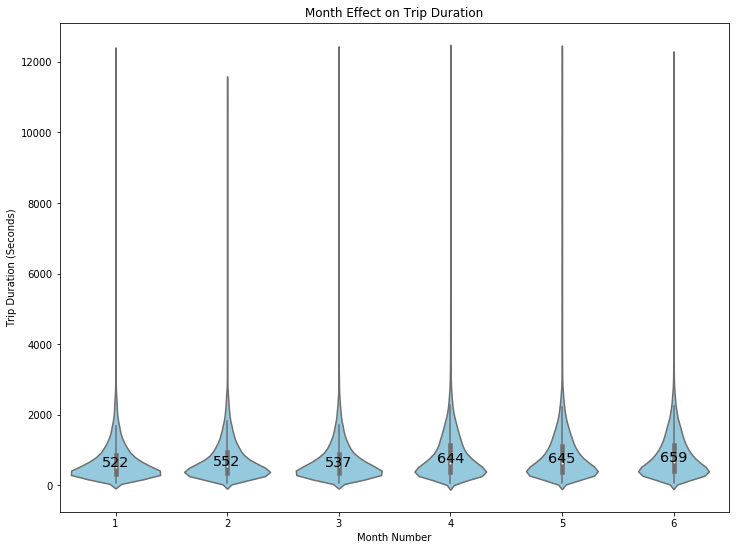

In [10]:
#remove outliers 2 standard deviations away from the mean to show violin plots better
arr = data['trip_duration']
mean = np.mean(data['trip_duration'], axis=0)
sd = np.std(data['trip_duration'], axis=0)
filtered_data = data[data.trip_duration > mean - 2 * sd]
filtered_data = data[data.trip_duration < mean + 2 * sd]


plt.subplots(figsize=(12,9))
ax = sns.violinplot(x="monthstart", y="trip_duration", data= filtered_data,color="skyblue")
ax.set_title('Month Effect on Trip Duration')
ax.set_xlabel('Month Number')
ax.set_ylabel('Trip Duration (Seconds)')

medians = filtered_data.groupby(['monthstart'])['trip_duration'].median().values
median_labels = [str(s) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 10, median_labels[tick], 
            horizontalalignment='center', verticalalignment='baseline', size='x-large', family = 'sans-serif', color='black')

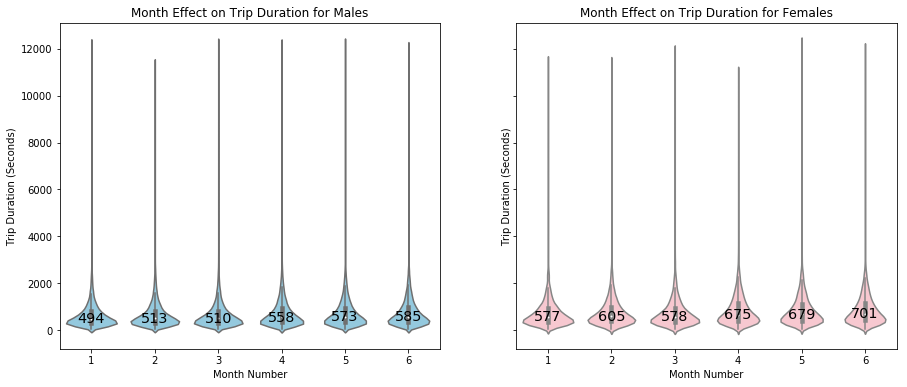

In [11]:
viofemales = filtered_data[filtered_data.gender == 'Female']
viomales = filtered_data[filtered_data.gender == 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))    

#histogram for male rides
ax1 = sns.violinplot(x="monthstart", y="trip_duration", data= viomales,color="skyblue", ax = ax1)
ax1.set_title('Month Effect on Trip Duration for Males')
ax1.set_xlabel('Month Number')
ax1.set_ylabel('Trip Duration (Seconds)')

medians = viomales.groupby(['monthstart'])['trip_duration'].median().values
median_labels = [str(s) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax1.get_xticklabels()):
    ax1.text(pos[tick], medians[tick] + 10, median_labels[tick], 
            horizontalalignment='center', verticalalignment='center', size='x-large', family = 'sans-serif', color='black')

# histogram for female rides
ax2 = sns.violinplot(x="monthstart", y="trip_duration", data= viofemales,color="pink", ax = ax2)
ax2.set_title('Month Effect on Trip Duration for Females')
ax2.set_xlabel('Month Number')
ax2.set_ylabel('Trip Duration (Seconds)')

medians = viofemales.groupby(['monthstart'])['trip_duration'].median().values
median_labels = [str(s) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax2.get_xticklabels()):
    ax2.text(pos[tick], medians[tick] + 10, median_labels[tick], 
            horizontalalignment='center', verticalalignment='center', size='x-large', family = 'sans-serif', color='black')

In [41]:
# statistical analysis
femalemean = viofemales.groupby(['monthstart'])['trip_duration'].mean().values
malemean = viomales.groupby(['monthstart'])['trip_duration'].mean().values
totalmean = filtered_data.groupby(['monthstart'])['trip_duration'].mean().values
meantable = pd.DataFrame({'Total Mean Trip Duration': totalmean.astype(int), 'Male Mean Trip Duration':malemean.astype(int), 'Female Mean Trip Duration': femalemean.astype(int)})
meantable

,Total Mean Trip Duration,Male Mean Trip Duration,Female Mean Trip Duration
0,660,640,728
1,690,663,776
2,672,654,735
3,769,733,874
4,775,745,861
5,797,764,887


In [39]:
femalemedian = viofemales.groupby(['monthstart'])['trip_duration'].median().values
malemedian = viomales.groupby(['monthstart'])['trip_duration'].median().values
totalmedian = filtered_data.groupby(['monthstart'])['trip_duration'].median().values
mediantable = pd.DataFrame({'Total Median Trip Duration': totalmedian, 'Male Median Trip Duration':malemedian, 'Female Median Trip Duration': femalemedian})
mediantable

,Total Median Trip Duration,Male Median Trip Duration,Female Median Trip Duration
0,512,494,577
1,532,513,605
2,524,510,578
3,585,558,675
4,598,573,679
5,613,585,701


In [44]:
femaletotaltrip = viofemales.groupby(['monthstart'])['trip_duration'].count().values
maletotaltrip = viomales.groupby(['monthstart'])['trip_duration'].count().values
totaltrip = filtered_data.groupby(['monthstart'])['trip_duration'].count().values
tabletrip = pd.DataFrame({'Total Count of Trips': totaltrip.astype(int), 'Male Count of Trips':maletotaltrip.astype(int), 'Female Count of Trips': femaletotaltrip.astype(int)})
tabletrip

,Total Count of Trips,Male Count of Trips,Female Count of Trips
0,30608,23792,6685
1,32529,24854,7560
2,30745,23768,6878
3,50685,37790,12700
4,59419,44023,15191
5,67563,49630,17693


In [14]:
# filtered_data removes the outliers and rows with NA birth year, and have valid Female/Male entries
filtered_data = filtered_data.dropna(subset=['birth_year'], axis = 0)
births = filtered_data.copy()
birthlist = list(births.birth_year)
birthlistage = [2017.0 - year for year in birthlist]
filtered_data['age'] = np.array(birthlistage)
femaledata = filtered_data[births.gender == 'Female']
maledata = filtered_data[births.gender == 'Male']

In [78]:
corr = filtered_data.drop(['unnamed:_0','birth_year'], axis = 1).corr().abs()
s = corr.unstack()
# sort from greatest to least correlation coeffcient 
sof = s.sort_values(kind="quicksort", ascending = False)
# top correlations related to estimated income per month
sof['trip_duration']

#month start has a greater person correlation between month start and trip duration than age

trip_duration    1.000000
monthstart       0.080555
age              0.014058
dtype: float64

In [58]:
femaletotaltrip = viofemales.groupby(['monthstart'])['trip_duration'].count().values
maletotaltrip = viomales.groupby(['monthstart'])['trip_duration'].count().values
totaltrip = filtered_data.groupby(['monthstart'])['trip_duration'].count().values
tabletrip = pd.DataFrame({'Month': [1,2,3,4,5,6], 'Male Count of Trips':maletotaltrip.astype(int), 'Female Count of Trips': femaletotaltrip.astype(int)})
tabletrip

corr = tabletrip.corr().abs()
s = corr.unstack()
# sort from greatest to least correlation coeffcient 
sof = s.sort_values(kind="quicksort", ascending = False)
# top correlations related to estimated income per month
sof['Month']

Month                    1.000000
Female Count of Trips    0.943346
Male Count of Trips      0.939783
dtype: float64

In [50]:
# import scipy.stats as test
# #https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
# # to test if there is significant difference in means of the two samples
# # lets us know if differences happened by chance
# #the larger the t score the larger the difference between groups
# # p values is the probability the data occur by chance
# print(test.ttest_ind(femaledata['monthstart'], femaledata['trip_duration']))
# print(test.ttest_ind(femaledata['age'], femaledata['trip_duration']))
# print(test.ttest_ind(maledata['monthstart'], maledata['trip_duration']))
# print(test.ttest_ind(maledata['age'], maledata['trip_duration']))
